>  # Multiple Linear Regression Bike Sharing

> ### Developer - Shashank Bhatnagar

### Problem Statement

-  BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


- They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

### Business Goals & Aim

> > Required to build the model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

> ## Steps:

> ## EDA

- Data Cleaning and Missing Data Analysis
- Outlier Analysis & Treatment Assumption values > Q3+1.5*IQR and values < Q1-1.5*IQR will be treated
- Deriving Categorical Columns
- Univariate Analysis
- Bivariate Analysis
- Multivariate Analysis

> ## Model Preparation

- Training and Test data split
- Feature Scaling - StandardScaler
- Feature Engineering & Selection using RFE and Variance Inflation factor
- Model preparation
- Residual Analysis
- Model Evaluation & Assessment
- Prediction 
- Conclusion & Analysis

### Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import statsmodels.api as stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings("ignore")
from sklearn.feature_selection import RFE
from pandasql import sqldf
import datetime as dt

### Loading Dataset

In [2]:
data = pd.read_csv("day.csv")

In [3]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### Data Overview

In [4]:
data.info() # no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Metadata Information

In [6]:
print ("Rows     : " ,data.shape[0])
print ("Columns  : " ,data.shape[1])
print ("\nFeatures : \n" ,data.columns.tolist())
print ("\nMissing values :  ", data.isnull().sum().values.sum())
print ("\nUnique values :  \n",data.nunique())

Rows     :  730
Columns  :  16

Features : 
 ['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

Missing values :   0

Unique values :  
 instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64


## Exploratory Data Analysis

### 1. Data Cleaning

In [7]:
#DataCleaning

#Dropping instant 7 dteday - since all values are unique it will not add much significance to model

data = data.drop(columns=['instant'],axis=1)



In [8]:
data.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### 1.1 Validating dteday with yr & mnth

In [9]:
data['dteday'] = pd.to_datetime(data['dteday'],dayfirst = True)
data['dteyear'] = data['dteday'].dt.year
data['dte_date'] = data['dteday'].dt.day
data['dte_month'] = data['dteday'].dt.month

data.head()

# yr 0 is 2018
# yr 1 is 2019

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,dteyear,dte_date,dte_month
0,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,2018,1,1
1,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2018,2,1
2,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2018,3,1
3,2018-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,2018,4,1
4,2018-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,2018,5,1


In [10]:
query1 = "select distinct dte_month,mnth from data"

print(sqldf(query1))


    dte_month  mnth
0           1     1
1           2     2
2           3     3
3           4     4
4           5     5
5           6     6
6           7     7
7           8     8
8           9     9
9          10    10
10         11    11
11         12    12


In [11]:
# derived month and mnth, derived year and yr are in sync dropping dteday dteyear dte_month,dte_date
# removing casual and registered column since our target variable is cnt & cnt = casual + registered

data = data.drop(columns=['dteday','dteyear','dte_month','casual','registered','dte_date'],axis=1)

data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


### 1.3 OutlierAnalysis

In [12]:
#Data Cleaning - OutlierAnalysis

#Before Outlieranalysis

outliers = []
out_summary = []
out_cols = ['temp','atemp','hum','windspeed']

print("Before outliers treatment\n\n",data[out_cols].describe())

#Outliers columns identification 

for i in out_cols:
    Q3,Q1 = np.percentile(data[i],[75,25])
    IQR = Q3-Q1
    lower_bound = Q1-1.5*IQR
    upper_bound = Q3+1.5*IQR

    if ((data[i].min() < lower_bound) or (data[i].max() > upper_bound)):
        out_summary.append("attribute \"{}\" with min value : {} -> max value : {} -> IQR {} -> lower_bound : {} match is {} -> upper_bound : {} match is {}".format(i,data[i].min(),data[i].max(),IQR,Q1-1.5*IQR,(data[i].min() < lower_bound),Q3+1.5*IQR,data[i].max() > upper_bound))
        outliers.append(i)

# List of outliers satisfying lower or upper bound        
for i in range(0,len(out_summary)):
    print("\nOutlier column with stats : \n\n{}\n".format(out_summary[i]))
    
#Outliers Treatment

for i in outliers:
    Q3,Q1 = np.percentile(data[i],[75,25])
    IQR = Q3-Q1
    lower_bound = Q1-1.5*IQR
    upper_bound = Q3+1.5*IQR
    data[i][data[i]<=lower_bound] = lower_bound
    data[i][data[i]>=upper_bound] = upper_bound


print("After outliers treatment\n\n",data[out_cols].describe())

Before outliers treatment

              temp       atemp         hum   windspeed
count  730.000000  730.000000  730.000000  730.000000
mean    20.319259   23.726322   62.765175   12.763620
std      7.506729    8.150308   14.237589    5.195841
min      2.424346    3.953480    0.000000    1.500244
25%     13.811885   16.889713   52.000000    9.041650
50%     20.465826   24.368225   62.625000   12.125325
75%     26.880615   30.445775   72.989575   15.625589
max     35.328347   42.044800   97.250000   34.000021

Outlier column with stats : 

attribute "hum" with min value : 0.0 -> max value : 97.25 -> IQR 20.989575000000002 -> lower_bound : 20.515637499999997 match is True -> upper_bound : 104.4739375 match is False


Outlier column with stats : 

attribute "windspeed" with min value : 1.5002439 -> max value : 34.000021 -> IQR 6.58393925 -> lower_bound : -0.8342588749999997 match is False -> upper_bound : 25.501498125 match is True

After outliers treatment

              temp       atemp

### 1.4 Deriving Categorical columns

In [13]:
#Converting weathersit and season columns to labelled column for interpretation
# season (1:spring, 2:summer, 3:fall, 4:winter)
# weathersit (1 : cloudy 2 :Mist 3 :LightRain 4:HeavyRain )
data['season'] = data['season'].apply(lambda x :'spring' if x == 1 else ('summer' if x == 2 else ('fall' if x==3 else 'winter')))
data['weathersit'] = data['weathersit'].apply(lambda x :'cloudy' if x == 1 else ('Mist' if x == 2 else ('LightRain' if x==3 else 'HeavyRain')))
data['mnth'] = data['mnth'].replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})
data['weekday'] = data['weekday'].replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})

data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,cloudy,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,cloudy,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,cloudy,9.305237,11.46350,43.6957,12.522300,1600


In [14]:
data['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [15]:
print ("Rows     : " ,data.shape[0])
print ("Columns  : " ,data.shape[1])
print ("\nFeatures : \n" ,data.columns.tolist())
print ("\nMissing values :  ", data.isnull().sum().values.sum())
print ("\nPercentage of rows deleted : {}%  ".format(round(100-100*len(data.index)/len(data.index),2)))

Rows     :  730
Columns  :  12

Features : 
 ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']

Missing values :   0

Percentage of rows deleted : 0.0%  


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


## 2. Univariate Analysis

> ### 2.1 Continuous Unitvariate Analysis

In [17]:
#Univariate Analysis - Continous Variable
def univariate_continous(continous_variable,df,x_size=6,y_size=6,color_v="g",bin="auto"):
    """
    continous_variabe: Continous featured column name
    bins : no of bins
    x_size : Figure xaxis size
    y_size : Figure yaxis size
    color_v : color parameter to the plot
    
    Assumption : Subject to business approval we will be removing values greater than greater than Q3 + 1.5 *IQR  hence Calculating Third and First Quartile values
    """
    
    print("\n Variable : {} \n\nSummary : \n\n{}\n\n".format(continous_variable,df[continous_variable].describe([.25, .5, .75,.95])))
    
    

    fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(13, 5))
    
    plt.figure(figsize=(x_size,y_size))
    
    ax1.boxplot(df[continous_variable])
    
    ax1.set_title(continous_variable)
    
    ax1.set_xlabel(continous_variable)
    
    ax1.set_ylabel("Quartile Range min to max")
    
    ax2.hist(df[continous_variable],color=color_v,bins=bin,edgecolor='red')
    
    ax2.set_title(continous_variable)
    
    ax2.set_xlabel(continous_variable)
    
    ax2.set_ylabel("Frequency")
    
    #plt.show()
    
    sns.distplot(df[continous_variable],kde=True,color=color_v,bins=bin,ax=ax3)
    
    ax3.set_title(continous_variable)
    
    ax3.set_xlabel(continous_variable)
    
    plt.show()

In [18]:
cat = []
con = []
for i in data:
    if data[i].dtype == 'object':
        cat.append(i)
    else:
        con.append(i)
        
print("Continuous columns\n",con)
print("\nCategorical Columns",cat)

Continuous columns
 ['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']

Categorical Columns ['season', 'mnth', 'weekday', 'weathersit']



 Variable : yr 

Summary : 

count    730.000000
mean       0.500000
std        0.500343
min        0.000000
25%        0.000000
50%        0.500000
75%        1.000000
95%        1.000000
max        1.000000
Name: yr, dtype: float64




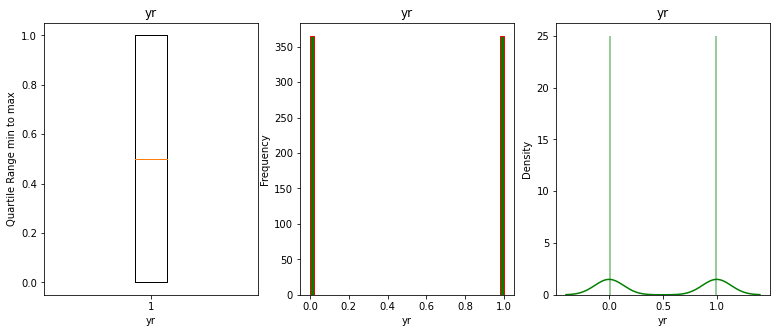

<Figure size 432x432 with 0 Axes>


 Variable : holiday 

Summary : 

count    730.000000
mean       0.028767
std        0.167266
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
95%        0.000000
max        1.000000
Name: holiday, dtype: float64




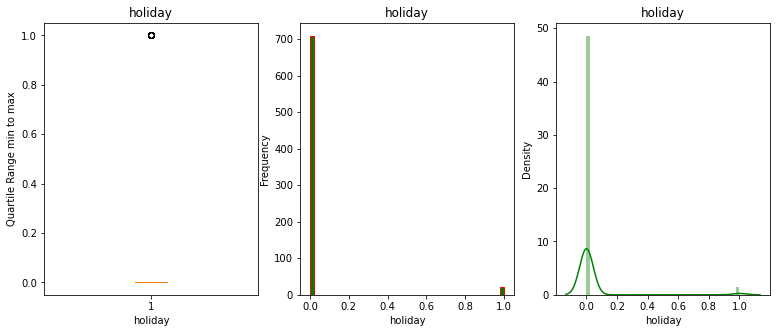

<Figure size 432x432 with 0 Axes>


 Variable : workingday 

Summary : 

count    730.000000
mean       0.683562
std        0.465405
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
95%        1.000000
max        1.000000
Name: workingday, dtype: float64




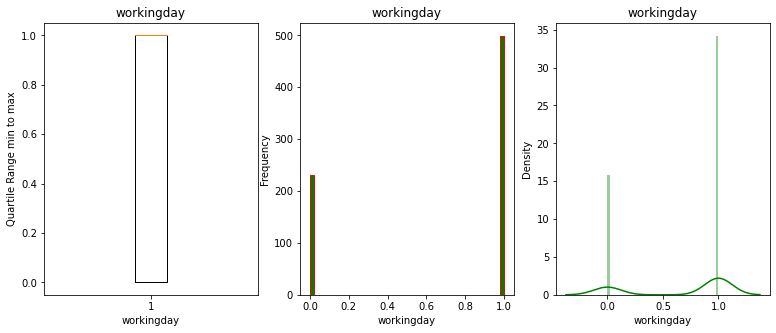

<Figure size 432x432 with 0 Axes>


 Variable : temp 

Summary : 

count    730.000000
mean      20.319259
std        7.506729
min        2.424346
25%       13.811885
50%       20.465826
75%       26.880615
95%       31.520460
max       35.328347
Name: temp, dtype: float64




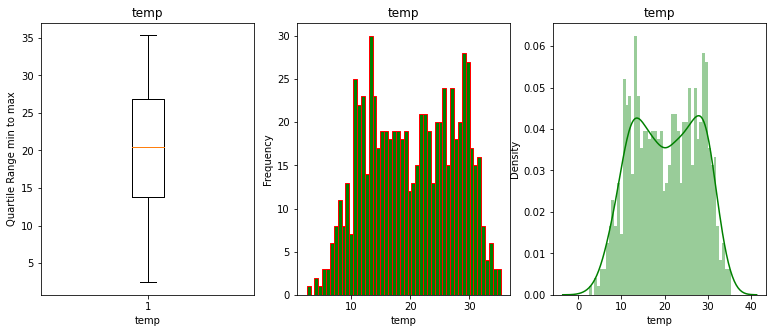

<Figure size 432x432 with 0 Axes>


 Variable : atemp 

Summary : 

count    730.000000
mean      23.726322
std        8.150308
min        3.953480
25%       16.889713
50%       24.368225
75%       30.445775
95%       35.749975
max       42.044800
Name: atemp, dtype: float64




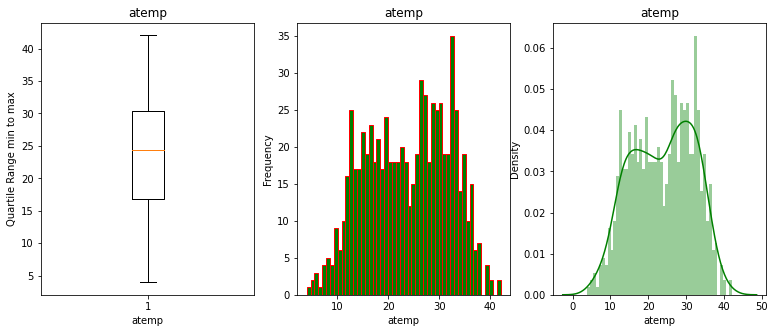

<Figure size 432x432 with 0 Axes>


 Variable : hum 

Summary : 

count    730.000000
mean      62.795640
std       14.126173
min       20.515637
25%       52.000000
50%       62.625000
75%       72.989575
95%       86.868735
max       97.250000
Name: hum, dtype: float64




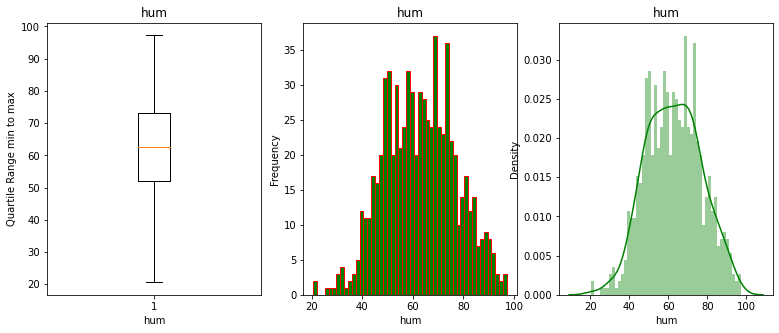

<Figure size 432x432 with 0 Axes>


 Variable : windspeed 

Summary : 

count    730.000000
mean      12.720661
std        5.071566
min        1.500244
25%        9.041650
50%       12.125325
75%       15.625589
95%       22.999988
max       25.501498
Name: windspeed, dtype: float64




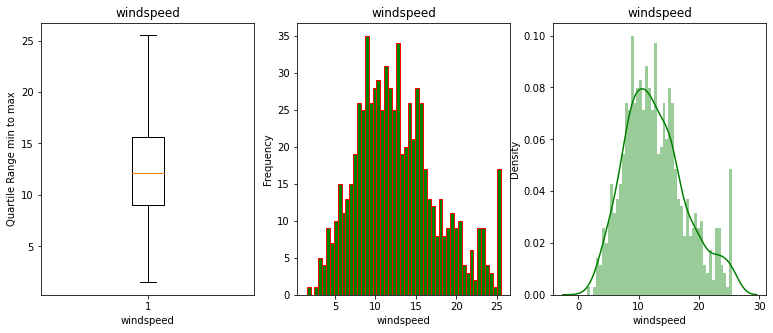

<Figure size 432x432 with 0 Axes>


 Variable : cnt 

Summary : 

count     730.000000
mean     4508.006849
std      1936.011647
min        22.000000
25%      3169.750000
50%      4548.500000
75%      5966.000000
95%      7576.400000
max      8714.000000
Name: cnt, dtype: float64




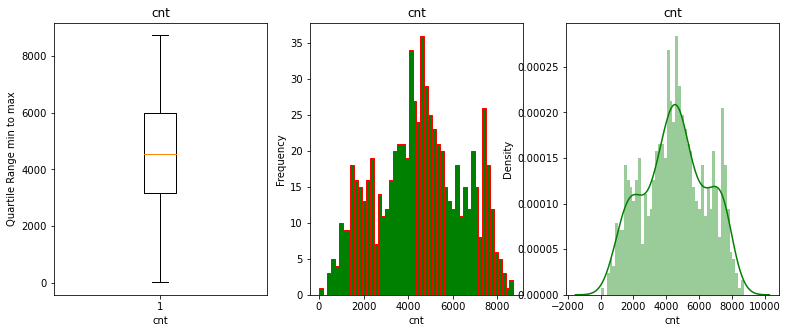

<Figure size 432x432 with 0 Axes>

In [19]:
# Continuous Univariate Analysis
# Year wise : In year 2019 we have 62.33 % of total Bike sharing
# Month wise : Aug,June,Sep,July,May,Oct  - from may to oct we have observe a upward trend in bike sharing 
# Highest no of bike sharing will be in fall season and then in summer.
# Around 97.62% of bike share use to be done on non holidays
# Around 69.6% of bike sharing is use to be done on working days
# HIghest no of bike sharing around 42% between temp 25-35 c and then 40% between 15 - 25 c
# Temp 15-35 c constitutes to 82 percent of total bike sharing
# aTemp 15-35 c constitutes to 82 percent of total bike sharing
# HIghest no of bike sharing around 52% between atemp 25-35 c
# Around 65% of total bike sharing between 50-75 humidity
# Around 69% of total bike sharing with cloudy weather and the mist with 30%
# Around 68% of total bike sharing is dne when the windspeed between 5 to 15

for i in con:
    univariate_continous(i,data,color_v="g",bin=50)



yr & count relationship

   sum(cnt)  yr  Percentage
0   2047742   1       62.23
1   1243103   0       37.77

 mnth & sum(cnt) relationship

     sum(cnt)  mnth
0     351194   aug
1     346342   jun
2     345991  sept
3     344948   jul
4     331686   may
5     322352   oct
6     269094   apr
7     254831   nov
8     228920   mar
9     211036   dec
10    149518   feb
11    134933   jan

 mnth,season & count relationship

     sum(cnt)  season  mnth  Percentage
0     351194    fall   aug       10.67
1     344948    fall   jul       10.48
2     249599    fall  sept        7.58
3     115388    fall   jun        3.51
4     149518  spring   feb        4.54
5     142065  spring   mar        4.32
6     134933  spring   jan        4.10
7      42998  spring   dec        1.31
8     331686  summer   may       10.08
9     269094  summer   apr        8.18
10    230954  summer   jun        7.02
11     86855  summer   mar        2.64
12    322352  winter   oct        9.80
13    254831  winter   nov 

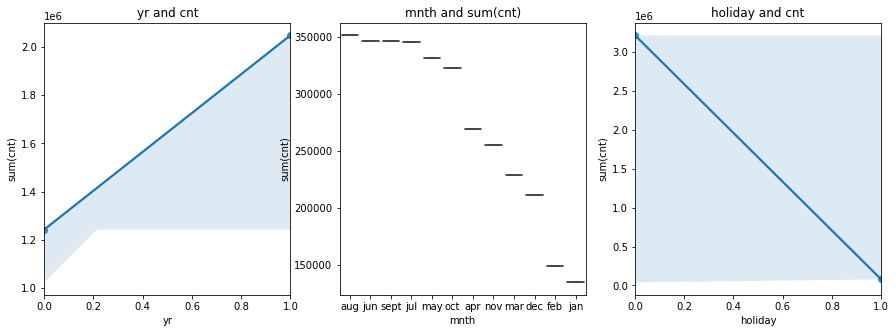

In [20]:
# Creating subplots

fig, (ax1, ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# year and cnt relationship
# In year 2019 we have 62.33 % of total Bike sharing

query = "select sum(cnt),yr from data group by yr order by sum(cnt) desc"

sql_data = sqldf(query)

sql_data['Percentage'] = sql_data['sum(cnt)'].apply(lambda x : round(100*x/sum(sql_data['sum(cnt)']),2))


print("\nyr & count relationship\n")

print(sql_data)

ax1.set_title("yr and cnt")
sns.regplot(sql_data['yr'],sql_data['sum(cnt)'],ax=ax1)

# month and cnt relationship
# Month wise : Aug,June,Sep,July,May,Oct  - from may to oct we have observe a upward trend in bike sharing

query = "select sum(cnt),mnth from data group by mnth order by sum(cnt) desc"

sql_data = sqldf(query)


print("\n mnth & sum(cnt) relationship")
print("\n",sql_data)

sns.boxplot('mnth','sum(cnt)',data=sql_data,ax=ax2)

ax2.set_title("mnth and sum(cnt)")
#sns.regplot(sql_data['mnth'],sql_data['sum(cnt)'],ax=ax2)

# season, mnth & cnt relationship
# Highest no of bike sharing will be in fall season and then in summer.

query = "select sum(cnt),season,mnth from data group by season,mnth order by season,sum(cnt) desc"

sql_data = sqldf(query)

sql_data['Percentage'] = sql_data['sum(cnt)'].apply(lambda x : round(100*x/sum(sql_data['sum(cnt)']),2))

print("\n mnth,season & count relationship")
print("\n",sql_data)

# holiday , cnt relationship

# Around 97.62% of bike share use to be done on non holidays

query = "select sum(cnt),holiday from data group by holiday order by holiday,sum(cnt) desc"

sql_data = sqldf(query)

ax3.set_title("holiday and cnt")

sns.regplot(sql_data['holiday'],sql_data['sum(cnt)'],ax=ax3)

sql_data['Percentage'] = sql_data['sum(cnt)'].apply(lambda x : round(100*x/sum(sql_data['sum(cnt)']),2))

print("\nholiday & count relationship")

print("\n",sql_data)


    sum(cnt)  workingday  Percentage
0   1000269           0        30.4
1   2290576           1        69.6


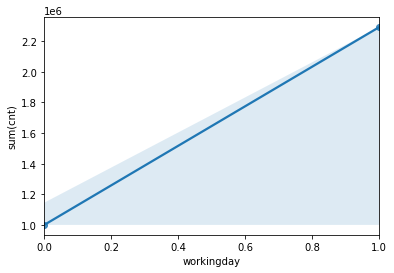

In [21]:
# workingday
# Around 69.6% of bike sharing is use to be done on working days

query = "select sum(cnt),workingday from data group by workingday order by workingday,sum(cnt) desc"

sql_data = sqldf(query)

sns.regplot(sql_data['workingday'],sql_data['sum(cnt)'])

sql_data['Percentage'] = sql_data['sum(cnt)'].apply(lambda x : round(100*x/sum(sql_data['sum(cnt)']),2))

print("\n",sql_data)

plt.show()


    sum(cnt) temp_summary  Percentage
0   1358137        25-35       41.27
1   1303539        15-25       39.61
2    523663        10-15       15.91
3     94915         5-10        2.88
4      5751          < 5        0.17
5      4840          >35        0.15


<AxesSubplot:xlabel='temp', ylabel='cnt'>

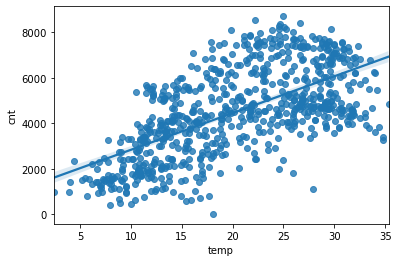

In [22]:
# temp binning and relation with cnt
# HIghest no of bike sharing around 42% between temp 25-35 c and then 40% between 15 - 25 c
# count is increasing with the increase in temp

data['temp_summary'] = data['temp'].apply(lambda x : '>35' if x >35 else ('25-35' if (x > 25 and x <=35) else ('15-25' if (x > 15 and x <=25) else ('10-15' if (x > 10 and x <=15) else ('5-10' if (x > 5 and x <=10) else '< 5')))))

query = "select sum(cnt),temp_summary from data group by temp_summary order by sum(cnt) desc"

sql_data = sqldf(query)

#sns.regplot(sql_data['dew_point'],sql_data['sum(cnt)'])


sql_data['Percentage'] = sql_data['sum(cnt)'].apply(lambda x : round(100*x/sum(sql_data['sum(cnt)']),2))

print("\n",sql_data)

data = data.drop(columns="temp_summary",axis=1)

sns.regplot(data['temp'],data['cnt'])


    sum(cnt) atemp_summary  Percentage
0   1720135         25-35       52.27
1    981354         15-25       29.82
2    278286           >35        8.46
3    266462         10-15        8.10
4     42641          5-10        1.30
5      1967           < 5        0.06


<AxesSubplot:xlabel='atemp', ylabel='cnt'>

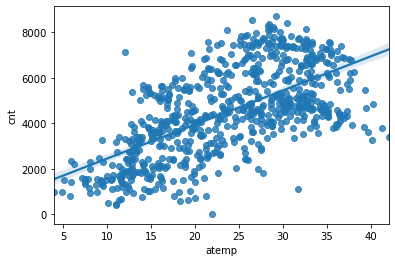

In [23]:
# atemp binning and relation with cnt
# aTemp 15-35 c constitutes to 82 percent of total bike sharing
# count is increasing with the increase in atemp

data['atemp_summary'] = data['atemp'].apply(lambda x : '>35' if x >35 else ('25-35' if (x > 25 and x <=35) else ('15-25' if (x > 15 and x <=25) else ('10-15' if (x > 10 and x <=15) else ('5-10' if (x > 5 and x <=10) else '< 5')))))

query = "select sum(cnt),atemp_summary from data group by atemp_summary order by sum(cnt) desc"

sql_data = sqldf(query)

#sns.regplot(sql_data['dew_point'],sql_data['sum(cnt)'])


sql_data['Percentage'] = sql_data['sum(cnt)'].apply(lambda x : round(100*x/sum(sql_data['sum(cnt)']),2))

print("\n",sql_data)


data = data.drop(columns="atemp_summary",axis=1)

sns.regplot(data['atemp'],data['cnt'])


    sum(cnt) hum_summary  Percentage
0   2122305       50-75       64.49
1    623361       25-50       18.94
2    538214       75-95       16.35
3      4707         >95        0.14
4      2258        5-25        0.07


<AxesSubplot:xlabel='hum', ylabel='cnt'>

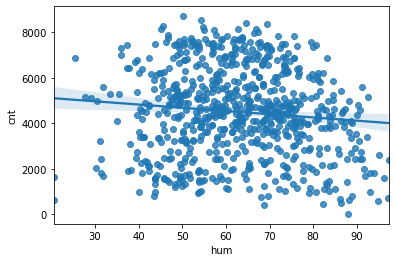

In [24]:
# humidity binning and relation with cnt
# Around 65% of total bike sharing between 50-75 humidity
# Count is decreasing with the increase in humidity

data['hum_summary'] = data['hum'].apply(lambda x : '>95' if x >95 else ('75-95' if (x > 75 and x <=95) else ('50-75' if (x > 50 and x <=75) else ('25-50' if (x > 25 and x <=50) else ('5-25' if (x > 5 and x <=25) else '< 5')))))

query = "select sum(cnt),hum_summary from data group by hum_summary order by sum(cnt) desc"

sql_data = sqldf(query)

#sns.regplot(sql_data['dew_point'],sql_data['sum(cnt)'])


sql_data['Percentage'] = sql_data['sum(cnt)'].apply(lambda x : round(100*x/sum(sql_data['sum(cnt)']),2))

print("\n",sql_data)

data = data.drop(columns="hum_summary",axis=1)

sns.regplot(data['hum'],data['cnt'])


    sum(cnt) windspeed_summary  Percentage
0   1219738             10-15       37.06
1   1045195              5-10       31.76
2    829052             15-25       25.19
3    144624               0-5        4.39
4     52236               >25        1.59


<AxesSubplot:xlabel='windspeed', ylabel='cnt'>

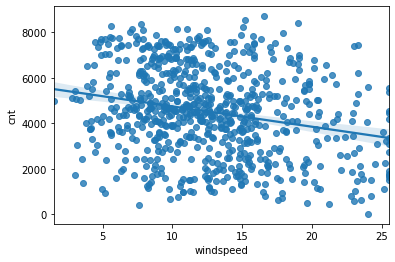

In [25]:
# windspeed binning and relation with cnt
# Around 68% of total bike sharing is done when the windspeed between 5 to 15
# Count is decreasing with the increase in windspeed

data['windspeed_summary'] = data['windspeed'].apply(lambda x : '>25' if x >25 else ('15-25' if (x > 15 and x <=25) else ('10-15' if (x > 10 and x <=15) else ('5-10' if (x > 5 and x <=10) else ('0-5' if (x > 0 and x <=5) else '< 0')))))

query = "select sum(cnt),windspeed_summary from data group by windspeed_summary order by sum(cnt) desc"

sql_data = sqldf(query)


sql_data['Percentage'] = sql_data['sum(cnt)'].apply(lambda x : round(100*x/sum(sql_data['sum(cnt)']),2))

print("\n",sql_data)

data = data.drop(columns="windspeed_summary",axis=1)

sns.regplot(data['windspeed'],data['cnt'])

In [26]:
# weathersit and cnt
# Around 69% of total bike sharing with cloudy weather and the mist with 30%

query = "select sum(cnt),weathersit from data group by weathersit order by sum(cnt) desc"

sql_data = sqldf(query)

#sns.regplot(sql_data['weathersit'],sql_data['sum(cnt)'])

sql_data['Percentage'] = sql_data['sum(cnt)'].apply(lambda x : round(100*x/sum(sql_data['sum(cnt)']),2))

print("\n",sql_data)

plt.show()


    sum(cnt) weathersit  Percentage
0   2257952     cloudy       68.61
1    995024       Mist       30.24
2     37869  LightRain        1.15


In [27]:
# season and cnt

# Fall have highest no of buke sharing cnt following summer

query = "select sum(cnt),season from data group by season order by sum(cnt) desc"

sql_data = sqldf(query)

#sns.regplot(sql_data['weathersit'],sql_data['sum(cnt)'])

sql_data['Percentage'] = sql_data['sum(cnt)'].apply(lambda x : round(100*x/sum(sql_data['sum(cnt)']),2))

print("\n",sql_data)

plt.show()


    sum(cnt)  season  Percentage
0   1061129    fall       32.24
1    918589  summer       27.91
2    841613  winter       25.57
3    469514  spring       14.27


In [28]:
# weekday and cnt

# bike sharing is uniformly distributed throught the weekdays cannot get any inference from this

query = "select sum(cnt),weekday from data group by weekday order by sum(cnt) desc"

sql_data = sqldf(query)

sql_data['Percentage'] = sql_data['sum(cnt)'].apply(lambda x : round(100*x/sum(sql_data['sum(cnt)']),2))

print("\n",sql_data)


    sum(cnt) weekday  Percentage
0    487790     fri       14.82
1    485395     thu       14.75
2    477807     sat       14.52
3    471214     wed       14.32
4    469109     tue       14.25
5    455503     mon       13.84
6    444027     sun       13.49


### 2.2 Univariate Categorical variable analysis

In [29]:


def univariate_categorical(category_name,kind='NA',x_size=6,y_size=6):
    
    """
    kind = 'pow' : will be use to show Power law distribution plot
    x_size = "Figure xaxis size"
    y_size = "Figure yaxis size"
    """
    
   
    print("{}\n".format(category_name))
    
    univariate_cat = pd.DataFrame(data[category_name].value_counts())
    
    univariate_cat.reset_index(level=0, inplace=True)
    
    univariate_cat.rename(columns = {'index':category_name,category_name:'frequency'},inplace =True)

    if kind == 'pow':
        
        # add rank column to below 
    
        univariate_cat['Rank'] = univariate_cat['frequency'].rank(ascending=False)
    
        print(univariate_cat)
    
        univariate_cat['frequency_log'] = np.log2(univariate_cat['frequency'])
    
        univariate_cat['Rank_log'] = np.log2(univariate_cat['Rank'])
    
        plt.plot(univariate_cat['Rank'],univariate_cat['frequency_log'])
    
        plt.title("Rank vs Frequency - Power Law Distribution - purpose")
    
        plt.xlabel("Log2(Rank)")
    
        plt.ylabel("Log2(Frequency)")
    
        plt.show()
    
    else:
        print(data[category_name].value_counts())
        
    plt.figure(figsize=(x_size,y_size))
    
    data[category_name].value_counts().plot.barh()
    
    category_val = category_name + " vs population"
    
    plt.title(category_val)
    
    plt.ylabel(category_name)
    
    plt.xlabel("Population")
    
    
    plt.show()
    
    plt.figure(figsize=(x_size,y_size))
    
    data[category_name].value_counts().plot.pie(shadow=True,autopct='%1.1f%%')
    
    category_val = category_name + " vs population %"
    
    plt.title(category_val)
    
    plt.figure(figsize=(12,12))
    
    plt.show()

season

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64


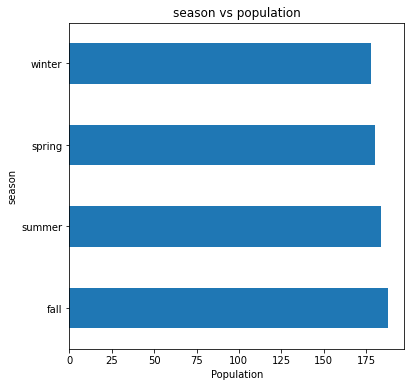

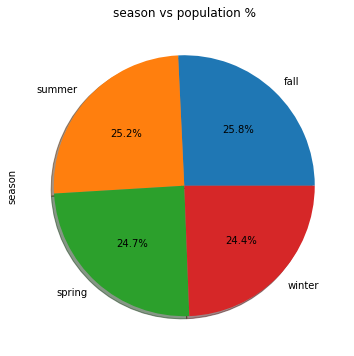

<Figure size 864x864 with 0 Axes>

In [30]:
# season vs data population is uniformly distributed
univariate_categorical('season',kind='NA',x_size=6,y_size=6)

weathersit

cloudy       463
Mist         246
LightRain     21
Name: weathersit, dtype: int64


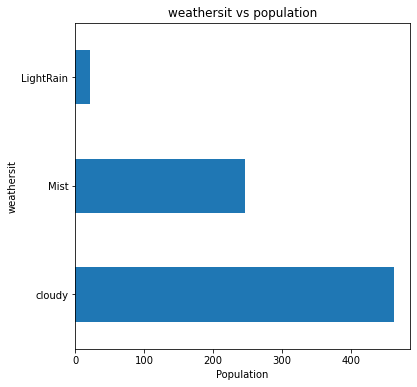

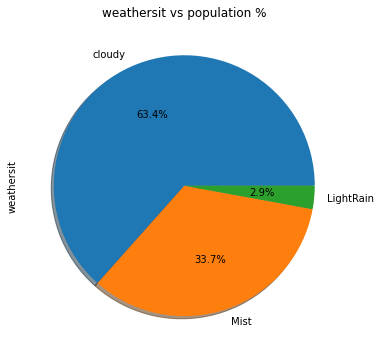

<Figure size 864x864 with 0 Axes>

In [31]:
#Around 63.4 % of Bike sharing population are cloudy
univariate_categorical('weathersit',kind='NA',x_size=6,y_size=6)

In [32]:
data['windspeed'].describe()

count    730.000000
mean      12.720661
std        5.071566
min        1.500244
25%        9.041650
50%       12.125325
75%       15.625589
max       25.501498
Name: windspeed, dtype: float64

In [33]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,cloudy,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,cloudy,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,cloudy,9.305237,11.46350,43.6957,12.522300,1600


### 2.3 Bivariate Analysis

In [34]:
#Bivariate Analysis

def bivariate_categorical(plot_list,x,y,z,x_size,y_size):
    """
    plot_list : list of plot types
    x : x axis variable
    y : y axis variable
    z : hue
    x_size : figure x axis size
    y_size : figure y axis size
    """
    
    if 'box' in plot_list:
        plt.figure(figsize=(x_size,y_size),facecolor='y')
        print("Relationship with {},{} & {}".format(x,y,z))
        sns.boxplot(x,y,hue=z,data=data,palette="hot")
        plt.show()
    if 'cat' in plot_list:
        plt.figure(figsize=(x_size,y_size),facecolor='y')
        print("Relationship with {},{} & {}".format(x,y,z))
        sns.catplot(x,y,hue=z,data=data,palette="hot")
        plt.show()
    if 'violin' in plot_list:
        plt.figure(figsize=(x_size,y_size),facecolor='y')
        print("Relationship with {},{} & {}".format(x,y,z))
        sns.violinplot(x,y,hue=z,data=data,palette="hot")
        plt.show()
    if 'bar' in plot_list:
        plt.figure(figsize=(x_size,y_size),facecolor='y')
        print("Relationship with {},{} & {}".format(x,y,z))
        sns.barplot(x,y,hue=z,data=data,palette="hot")
        plt.show()
        

def bivariate_continuous(plot_list,x,y,z,x_size=6,y_size=6):
     """
     plot_list : list of plot types
     x : x axis variable
     y : y axis variable
     z : hue
     x_size : figure x axis size
     y_size : figure y axis size
     """
     if 'joint' in plot_list:
        if x == y or y ==z : 
            pass
        else:
            print("Relationship with {},{} & {}".format(x,y,z))
            plt.figure(figsize=(x_size,y_size),facecolor='y')
            sns.jointplot(x,y,hue=z,data=data,palette="hot")
            plt.show()
        
     if 'scatter' in plot_list:
        if x == y or y == z: 
            pass
        else:
            print("Relationship with {},{} & {}".format(x,y,z))
            plt.figure(figsize=(x_size,y_size),facecolor='y')
            sns.scatterplot(x,y,hue=z,data=data,palette="hot")
            plt.show()

Relationship with cnt,yr & weathersit


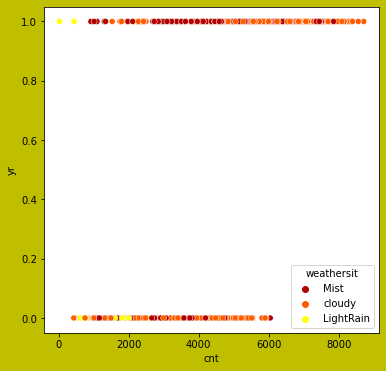

Relationship with cnt,holiday & weathersit


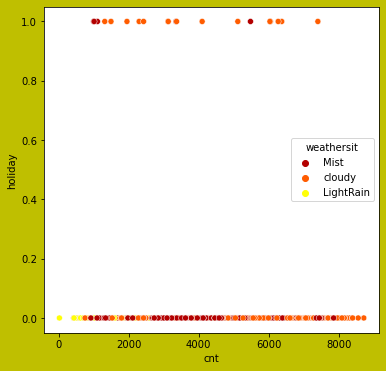

Relationship with cnt,workingday & weathersit


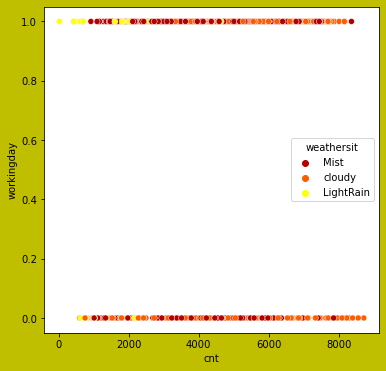

Relationship with cnt,temp & weathersit


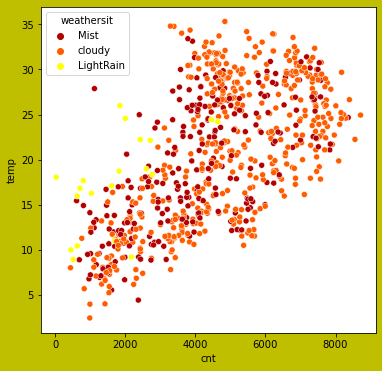

Relationship with cnt,atemp & weathersit


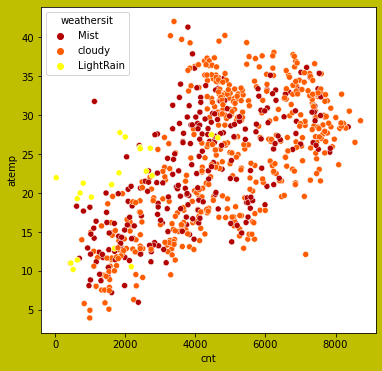

Relationship with cnt,hum & weathersit


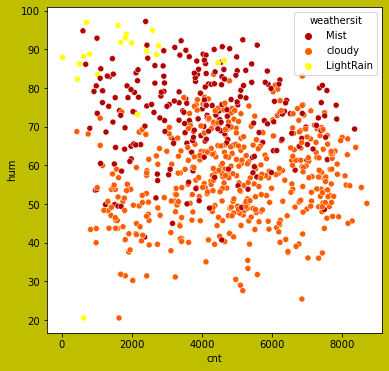

Relationship with cnt,windspeed & weathersit


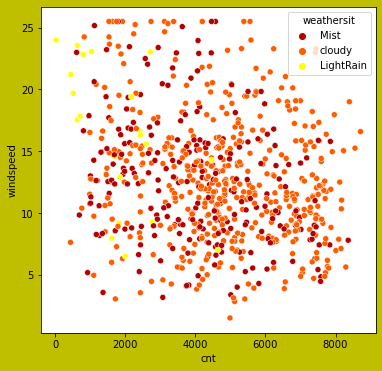

In [35]:
# Can see a linear relationship between cnt & temp ,atemp
for i in con : 
        bivariate_continuous(['scatter'],'cnt',i,'weathersit')

Relationship with season,cnt & season


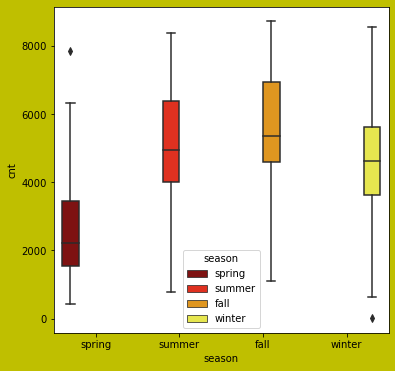

Relationship with season,cnt & season


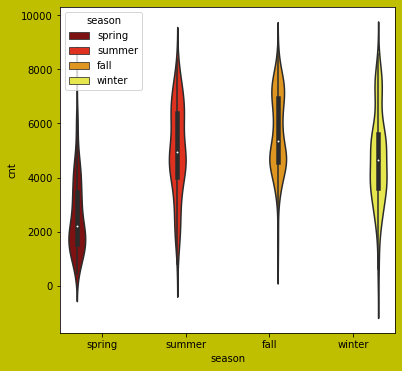

Relationship with mnth,cnt & season


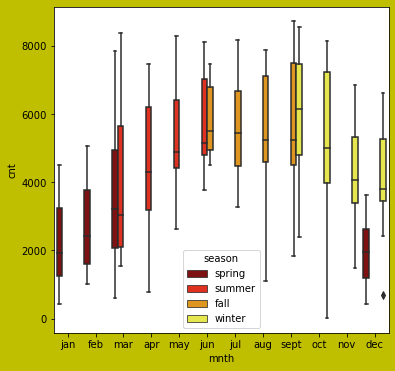

Relationship with mnth,cnt & season


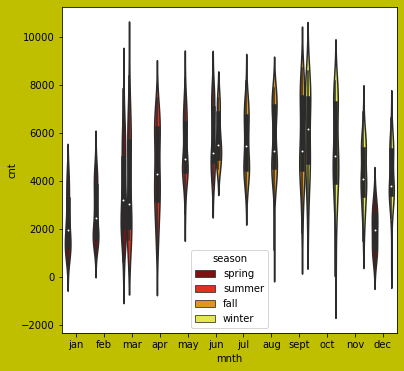

Relationship with weekday,cnt & season


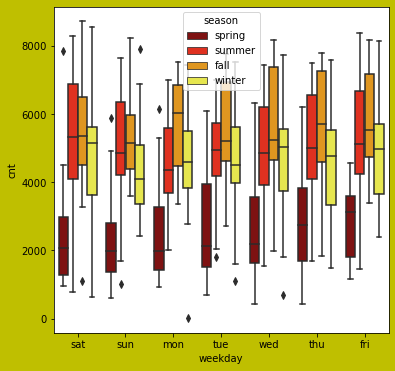

Relationship with weekday,cnt & season


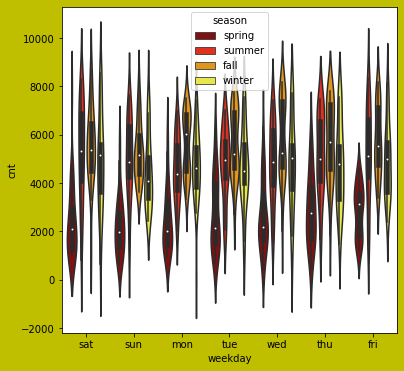

Relationship with weathersit,cnt & season


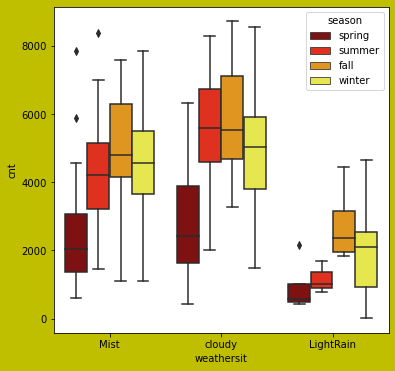

Relationship with weathersit,cnt & season


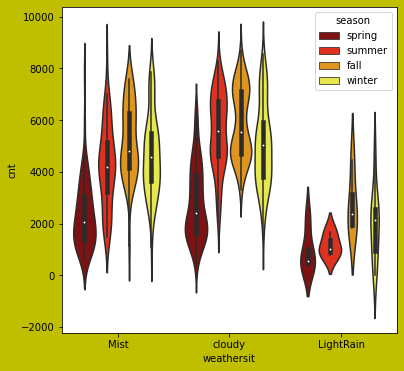

In [36]:
# Fall have highest no of bike sharing then summer then winter and spring have least no of bike sharing
# The above trend follows the same for every season i.e. for every season Fall have highest no of bike sharing then summer then winter and spring have least no of bike sharing
for i in cat : 
        bivariate_categorical(['box','violin'],i,'cnt','season',6,6)

### 2.4 MultiVariate Analysis

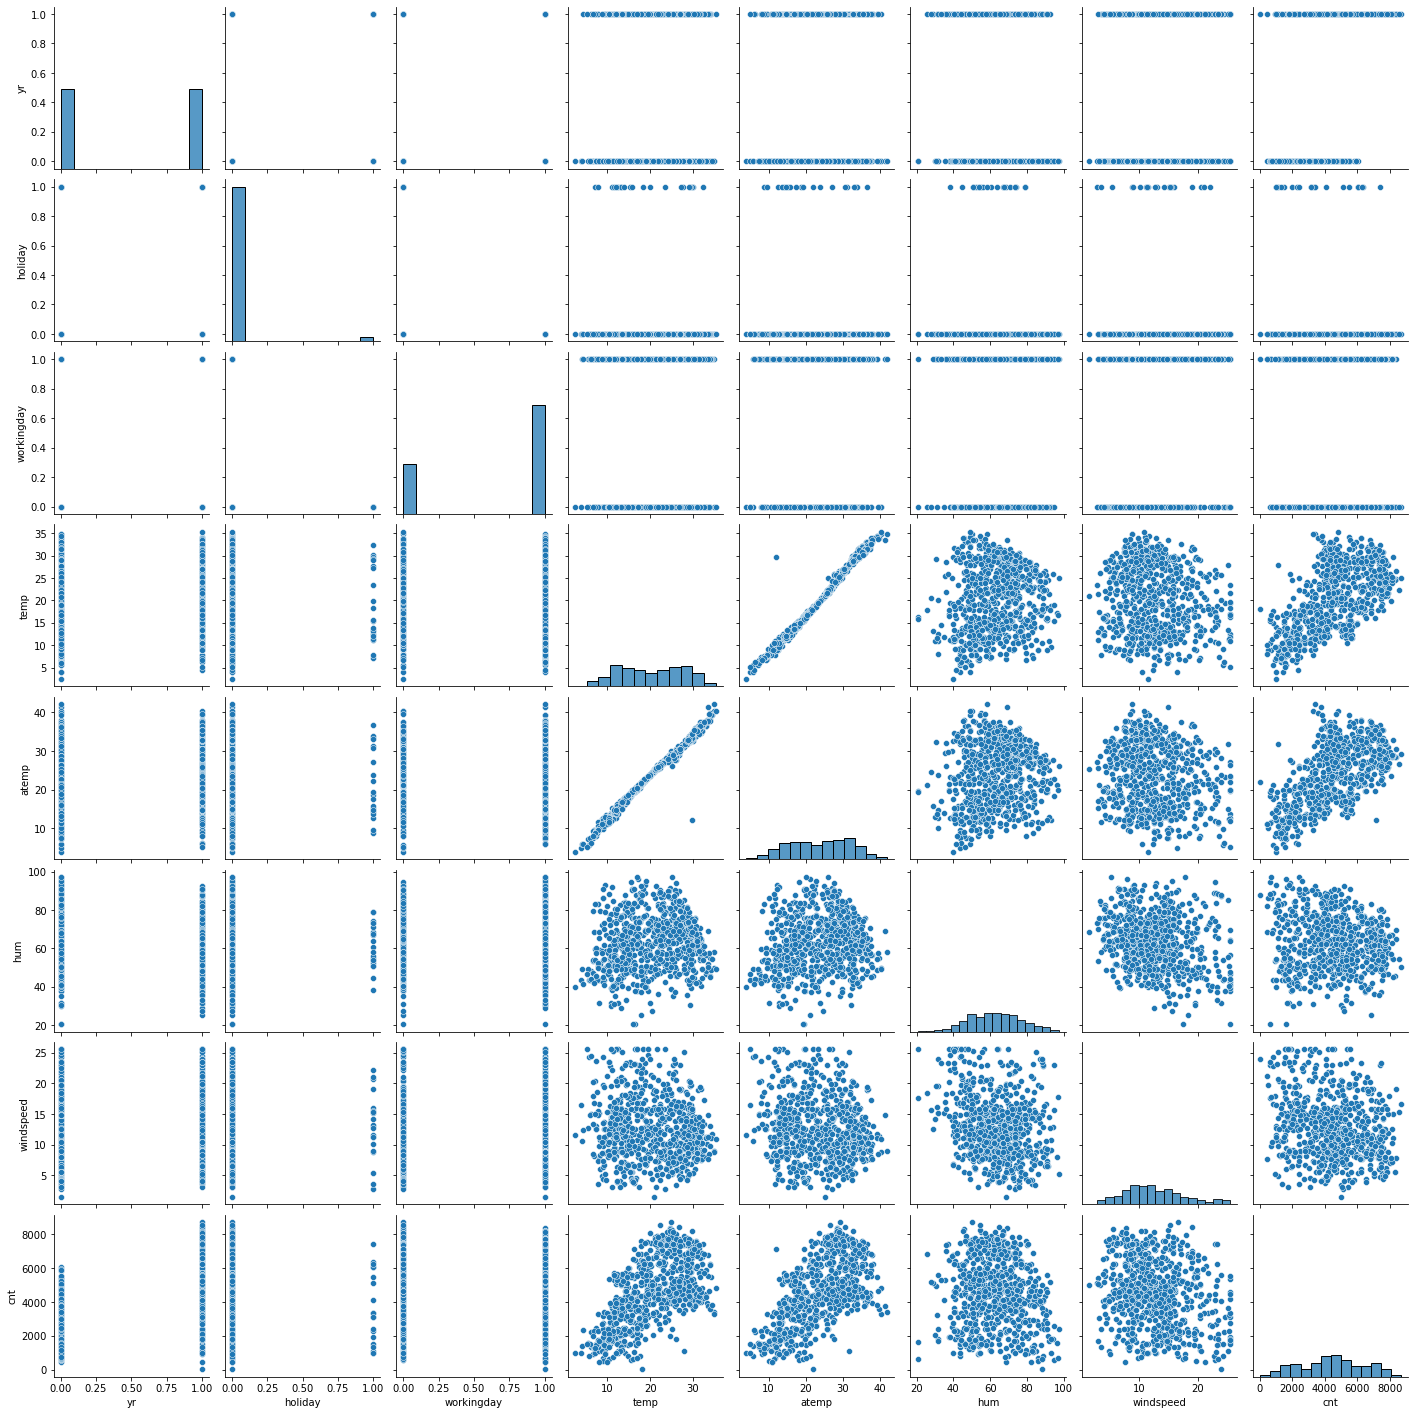

In [37]:
sns.pairplot(data)

<AxesSubplot:>

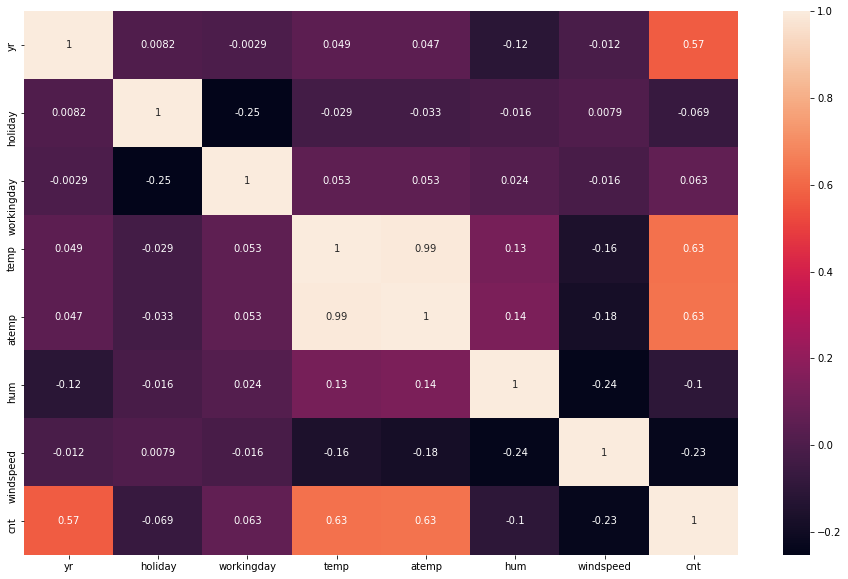

In [38]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(),annot=True)

# variables which have high correleation with cnt

# cnt have correlation with below fields (In decreasing correlation order) 
# cnt ~ registered,temp,atemp,yr,dew_point,season,mnth,windspeed(negative corr)
# temp have high correlation with atemp it seems atemp is derived from temp so we can keep temp column and remove atemp
# mnth & season have good correlation
# weathersit & hum have good correlation

> ##  EDA Infrences

> ## Univariate Analysis
- 1.  Year wise : In year 2019 we have 62.33 % of total Bike sharing
- 2. Month wise : Aug,June,Sep,July,May,Oct  - from may to oct we have observe a upward trend in bike sharing 
- 3. Highest no of bike sharing will be in fall season and then in summer and spring have least no of bike sharing. - 4. The above trend follows the same for every season i.e. for every season Fall have highest no of bike sharing then summer then winter and spring have least no of bike sharing
- 5. Around 97.62% of bike share use to be done on non holidays
- 6. Around 69.6% of bike sharing is use to be done on working days
- 7. HIghest no of bike sharing around 42% between temp 25-35 c and then 40% between 15 - 25 c
- 8. Temp 15-35 c constitutes to 82 percent of total bike sharing and count is increasing with the increase in temp
- 9. aTemp 15-35 c constitutes to 82 percent of total bike sharing and count is increasing with the increase in atemp
- 10. HIghest no of bike sharing around 52% between atemp 25-35 c
- 11. Around 65% of total bike sharing between 50-75 humidity and Count is decreasing with the increase in humidity
- 12. Around 69% of total bike sharing with cloudy weather and the mist with 30% 
- 13. Count is decreasing with the increase in windspeed
- 14. Around 63.4 % of Bike sharing population are cloudy
- 15. Linear relationship between cnt & temp ,atemp
 

> ## Variables which have high correlation with cnt

- 16. cnt have correlation with below fields (In decreasing correlation order) 
- 17. cnt ~ registered,temp,atemp,yr,season,mnth,windspeed(negative corr)
- 18. temp have high correlation with atemp it seems atemp is derived from temp so we can keep temp column and remove atemp
- 19. mnth & season have good correlation
- 20. weathersit & hum have good correlation



In [39]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,cloudy,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,cloudy,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,cloudy,9.305237,11.46350,43.6957,12.522300,1600


In [40]:
## 3. Categorical Encoding

#mnth

data = pd.get_dummies(data=data,columns=['mnth'],drop_first=True)
data = pd.get_dummies(data=data,columns=['weekday'],drop_first=True)
data = pd.get_dummies(data=data,columns=['season'],drop_first=True)
data = pd.get_dummies(data=data,columns=['weathersit'],drop_first=True)

#data = data.drop(columns=['mnth','weekday','season','weathersit'],axis=1)

In [41]:
data.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul',
       'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'season_spring', 'season_summer',
       'season_winter', 'weathersit_Mist', 'weathersit_cloudy'],
      dtype='object')

In [42]:
pd. set_option("display.max_columns", None) 
data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,season_spring,season_summer,season_winter,weathersit_Mist,weathersit_cloudy
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1


In [43]:
#Spliting testing and training data 

df_train,df_test = train_test_split(data,test_size=.3,random_state = 42)

print(df_train.shape)
print(df_test.shape)

(511, 30)
(219, 30)


In [44]:
#Scaling the values

scaled_list = ['temp','atemp','hum','windspeed']

#Using StandardScaler 
scaler = StandardScaler()

# Fit & Transform Training set
df_train[scaled_list] = scaler.fit_transform(df_train[scaled_list])
df_test[scaled_list] = scaler.transform(df_test[scaled_list])

df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,season_spring,season_summer,season_winter,weathersit_Mist,weathersit_cloudy
683,1,0,1,-0.985606,-0.960523,-0.107509,-0.474196,5445,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0
645,1,1,0,-0.647121,-0.571139,0.539942,0.025087,5478,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0
163,0,0,1,0.734280,0.749386,-1.021213,1.599072,5020,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
360,0,0,1,-0.967311,-0.941145,0.924183,0.008364,1162,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0
640,1,0,1,0.857783,0.733833,1.151095,-1.650438,7572,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0


In [45]:
xtrain = df_train.drop(columns=['cnt'],axis=1)
xtest  = df_test.drop(columns=['cnt'],axis=1)
ytrain = df_train[['cnt']]
ytest  = df_test[['cnt']]

In [46]:
xtrain.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,season_spring,season_summer,season_winter,weathersit_Mist,weathersit_cloudy
count,511.000000,511.000000,511.000000,5.110000e+02,5.110000e+02,5.110000e+02,5.110000e+02,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.00000,511.00000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.520548,0.027397,0.669276,1.665335e-16,-2.172648e-18,1.034180e-16,-5.062269e-17,0.074364,0.074364,0.074364,0.088063,0.091977,0.084149,0.062622,0.091977,0.091977,0.09002,0.09002,0.148728,0.150685,0.152642,0.146771,0.131115,0.140900,0.230920,0.258317,0.250489,0.346380,0.624266
std,0.500067,0.163398,0.470935,1.000980e+00,1.000980e+00,1.000980e+00,1.000980e+00,0.262619,0.262619,0.262619,0.283664,0.289276,0.277883,0.242520,0.289276,0.289276,0.28649,0.28649,0.356169,0.358092,0.359994,0.354224,0.337857,0.348259,0.421834,0.438138,0.433719,0.476282,0.484786
min,0.000000,0.000000,0.000000,-2.426671e+00,-2.474620e+00,-3.122793e+00,-2.251261e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,-8.662834e-01,-8.145566e-01,-7.750294e-01,-7.195787e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,1.076170e-01,1.728600e-01,3.771514e-02,-1.611029e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,1.000000,8.554967e-01,8.077908e-01,7.214720e-01,6.089887e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.978457e+00,2.225353e+00,2.433907e+00,2.623294e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 3. Building Models using Automated Approach RFE and Manual Feature Elimination using VIF


## 3.1 Automated Approach RFE

RFE(
    estimator,
    n_features_to_select=None,
)

In [47]:
# Model creating using sklearn.linear_model LinearRegression 
lr = LinearRegression()

lr_model = lr.fit(xtrain,ytrain)

# Selected RFE using sklearn.feature_selection
rfe = RFE(lr_model,15)

rfe = rfe.fit(xtrain,ytrain)

In [48]:
# created list with rfe rank and rfe support model since we have selected 15 features can see that the rank is 1 for them and then added different features based on their importance
list(zip(xtrain.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', False, 5),
 ('atemp', True, 1),
 ('hum', False, 4),
 ('windspeed', False, 7),
 ('mnth_aug', False, 9),
 ('mnth_dec', False, 13),
 ('mnth_feb', True, 1),
 ('mnth_jan', False, 2),
 ('mnth_jul', False, 3),
 ('mnth_jun', False, 10),
 ('mnth_mar', True, 1),
 ('mnth_may', True, 1),
 ('mnth_nov', False, 14),
 ('mnth_oct', True, 1),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 12),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 11),
 ('weekday_tue', False, 8),
 ('weekday_wed', False, 15),
 ('season_spring', True, 1),
 ('season_summer', False, 6),
 ('season_winter', True, 1),
 ('weathersit_Mist', True, 1),
 ('weathersit_cloudy', True, 1)]

In [49]:
# list of columns which have rfe support

rfe_support_list = xtrain.columns[rfe.support_]

rfe_support_list

Index(['yr', 'holiday', 'workingday', 'atemp', 'mnth_feb', 'mnth_mar',
       'mnth_may', 'mnth_oct', 'mnth_sept', 'weekday_sat', 'weekday_sun',
       'season_spring', 'season_winter', 'weathersit_Mist',
       'weathersit_cloudy'],
      dtype='object')

In [50]:
# list of columns which have rfe support is False i.e not useful

xtrain.columns[~rfe.support_]



Index(['temp', 'hum', 'windspeed', 'mnth_aug', 'mnth_dec', 'mnth_jan',
       'mnth_jul', 'mnth_jun', 'mnth_nov', 'weekday_mon', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'season_summer'],
      dtype='object')

> # 3.2 Building model using statsmodel.api OLS

In [51]:
# Function to return the OLS model input parameter will be the DataFrame

def ols_model(df_ytrain,df_xtrain_rfe):
    """
    # Input parameter wll be the training dataset and output will be the ols model
    # we need to add constant to the xtrain and before fitting to OLS
    """
    df_xtrain_sm = stats.add_constant(df_xtrain_rfe)
    lm = stats.OLS(df_ytrain,df_xtrain_sm)
    model = lm.fit()
    return model,df_xtrain_sm

# Function to return the Varince Inflation Factor 

def variance_inflation(df_xtrain):
    """
    # Input parameter will be the training dataset and the output will be the vif data frame
    """
    vif = pd.DataFrame()
    vif['features'] = df_xtrain.columns
    vif['VIF'] = [variance_inflation_factor(df_xtrain.values,i) for i in range(df_xtrain.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by="VIF",ascending=False)
    return vif

## Manual Elimination order

"""
High pvalue , high VIF - remove first
High pvalue , low VIF - remove second
Low  pvalue , high VIF - removed third
"""

'\nHigh pvalue , high VIF - remove first\nHigh pvalue , low VIF - remove second\nLow  pvalue , high VIF - removed third\n'

In [52]:
# Selecting variables which have the RFE support and some additional columns based on EDA analysis which is explainable


rfe_support_and_eda_analysis_list = ['yr', 'holiday', 'workingday', 'temp', 'mnth_feb', 'mnth_mar',
       'mnth_may', 'mnth_oct', 'mnth_sept', 'weekday_sat', 'weekday_sun',
       'season_spring', 'season_winter', 'weathersit_Mist',
       'weathersit_cloudy','windspeed','hum','mnth_jul'] 

xtrain_rfe = xtrain[rfe_support_and_eda_analysis_list]

In [53]:
xtrain_rfe.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'mnth_feb', 'mnth_mar',
       'mnth_may', 'mnth_oct', 'mnth_sept', 'weekday_sat', 'weekday_sun',
       'season_spring', 'season_winter', 'weathersit_Mist',
       'weathersit_cloudy', 'windspeed', 'hum', 'mnth_jul'],
      dtype='object')

## 3.3.1 Model1

In [54]:
#Initial model created model with all rfe support and eda analysis list
model1,df_xtrain_sm1 = ols_model(ytrain,xtrain_rfe)
vif = variance_inflation(xtrain_rfe)
print(model1.summary())
print("\n Variance Inflation Factor \n",vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     157.8
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          7.94e-187
Time:                        00:33:25   Log-Likelihood:                -4116.8
No. Observations:                 511   AIC:                             8270.
Df Residuals:                     493   BIC:                             8346.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1409.4031    190.68

## 3.3.2 Model2

In [55]:
# Dropping Holiday since it has high pvalue

xtrain_rfe = xtrain_rfe.drop(columns=["holiday"],axis=1)

model1,df_xtrain_sm1 = ols_model(ytrain,xtrain_rfe)
vif = variance_inflation(xtrain_rfe)
print(model1.summary())
print("\n Variance Inflation Factor \n",vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     157.8
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          7.94e-187
Time:                        00:33:25   Log-Likelihood:                -4116.8
No. Observations:                 511   AIC:                             8270.
Df Residuals:                     493   BIC:                             8346.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1297.5036    315.78

## 3.3.3 Model3

In [56]:
# Dropping mnth_feb since it has high pvalue

xtrain_rfe = xtrain_rfe.drop(columns=["mnth_feb"],axis=1)

model1,df_xtrain_sm1 = ols_model(ytrain,xtrain_rfe)
vif = variance_inflation(xtrain_rfe)
print(model1.summary())
print("\n Variance Inflation Factor \n",vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     167.3
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          1.43e-187
Time:                        00:33:25   Log-Likelihood:                -4117.7
No. Observations:                 511   AIC:                             8269.
Df Residuals:                     494   BIC:                             8341.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1284.9246    315.87

## 3.3.4 Model4

In [57]:
# Dropping weekday_sun since it has high pvalue

xtrain_rfe = xtrain_rfe.drop(columns=["weekday_sun"],axis=1)

model1,df_xtrain_sm1 = ols_model(ytrain,xtrain_rfe)
vif = variance_inflation(xtrain_rfe)
print(model1.summary())
print("\n Variance Inflation Factor \n",vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     177.4
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          5.09e-188
Time:                        00:33:25   Log-Likelihood:                -4119.3
No. Observations:                 511   AIC:                             8271.
Df Residuals:                     495   BIC:                             8338.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1633.2654    248.69

## 3.3.5 Model5

In [58]:
# Dropping weathersit_cloudy since it has high VIF

xtrain_rfe = xtrain_rfe.drop(columns=["weathersit_cloudy"],axis=1)

model1,df_xtrain_sm1 = ols_model(ytrain,xtrain_rfe)
vif = variance_inflation(xtrain_rfe)
print(model1.summary())
print("\n Variance Inflation Factor \n",vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     165.6
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          1.25e-176
Time:                        00:33:25   Log-Likelihood:                -4149.2
No. Observations:                 511   AIC:                             8328.
Df Residuals:                     496   BIC:                             8392.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3364.9719    120.851     

In [59]:
#Calculating RFE on remaining set of training data

lr = LinearRegression()

lr_model = lr.fit(xtrain_rfe,ytrain)

# Selected RFE using sklearn.feature_selection

rfe = RFE(lr_model,15)

rfe = rfe.fit(xtrain_rfe,ytrain)

list(zip(xtrain_rfe.columns,rfe.support_,rfe.ranking_))

# list of columns which have rfe support

rfe_support_list = xtrain_rfe.columns[rfe.support_]

rfe_support_list

Index(['yr', 'workingday', 'temp', 'mnth_mar', 'mnth_may', 'mnth_oct',
       'mnth_sept', 'weekday_sat', 'season_spring', 'season_winter',
       'weathersit_Mist', 'windspeed', 'hum', 'mnth_jul'],
      dtype='object')

### Creating the correlation matrix to identfy the correlation between the remaining features

<AxesSubplot:>

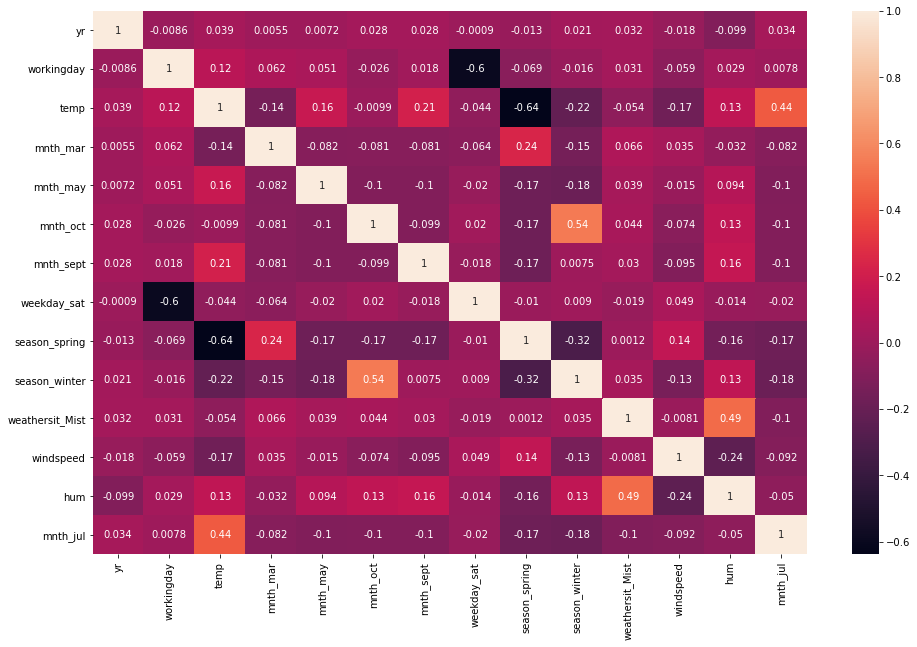

In [60]:
plt.figure(figsize=(16,10))

sns.heatmap(xtrain_rfe.corr(),annot=True)

<AxesSubplot:>

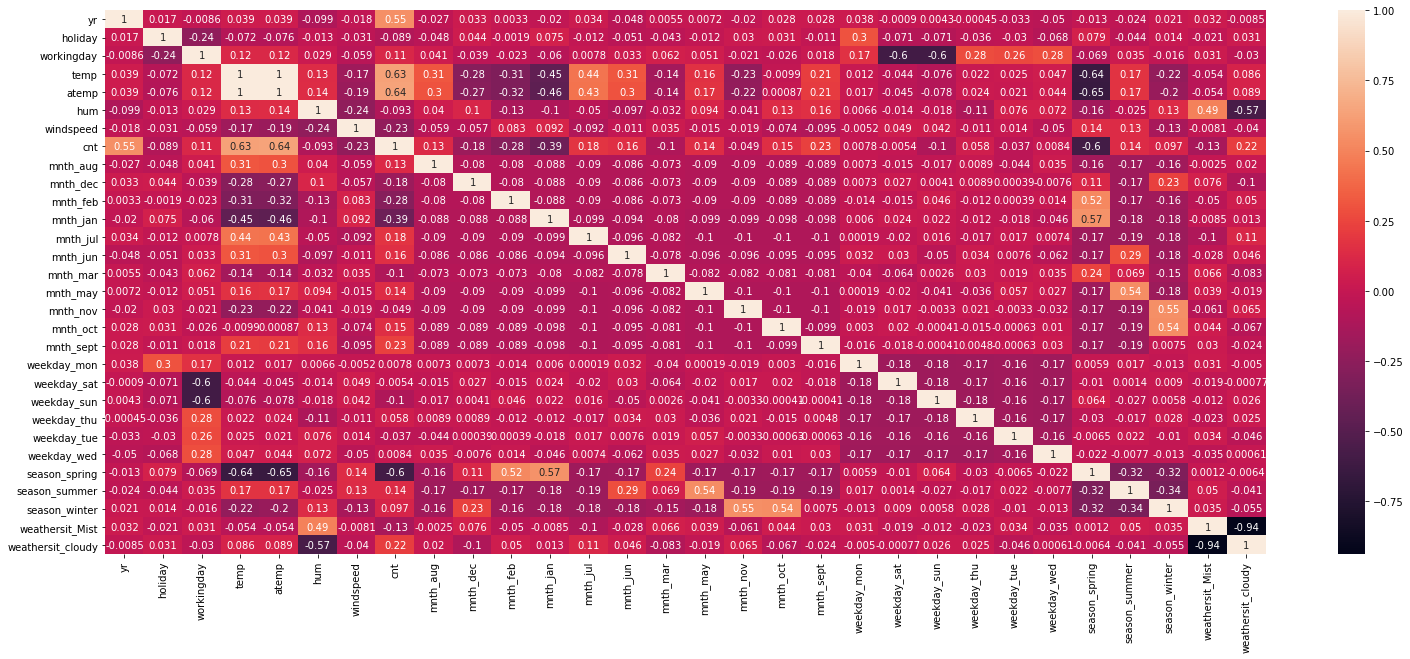

In [61]:
plt.figure(figsize=(26,10))

sns.heatmap(df_train.corr(),annot=True)

## 3.3.6 Model6

In [62]:
# Dropping mnth_jul since it has high correlation with temp 

xtrain_rfe = xtrain_rfe.drop(columns=["mnth_jul"],axis=1)

model1,df_xtrain_sm1 = ols_model(ytrain,xtrain_rfe)
vif = variance_inflation(xtrain_rfe)
print(model1.summary())
print("\n Variance Inflation Factor \n",vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     175.1
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          5.56e-176
Time:                        00:33:28   Log-Likelihood:                -4153.4
No. Observations:                 511   AIC:                             8335.
Df Residuals:                     497   BIC:                             8394.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3292.4843    119.071     

<AxesSubplot:>

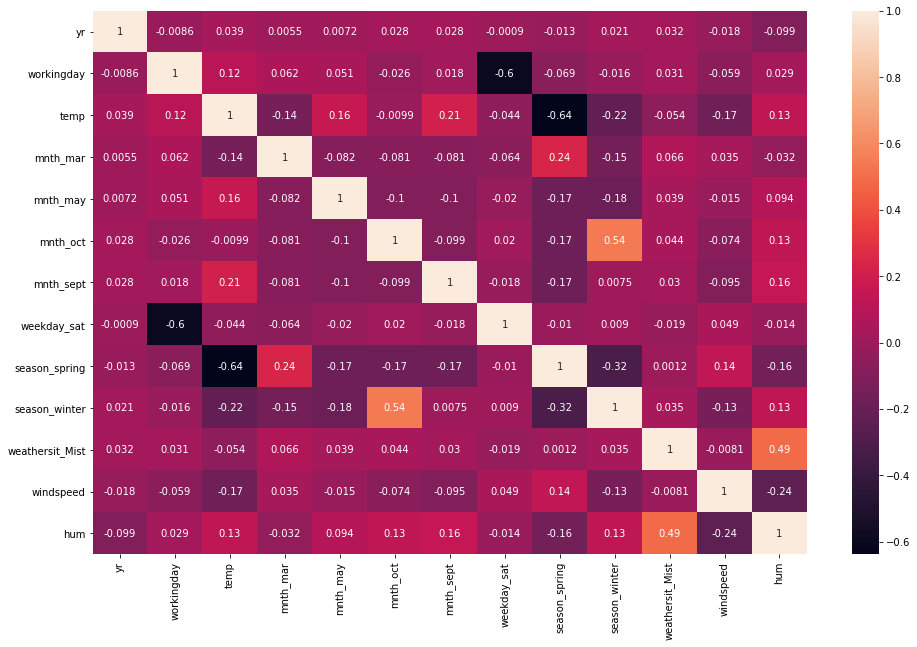

In [63]:
plt.figure(figsize=(16,10))

sns.heatmap(xtrain_rfe.corr(),annot=True)

## 3.3.7 Model7

In [64]:
# Dropping mnth_oct since it has high correlation with season_winter 

xtrain_rfe = xtrain_rfe.drop(columns=["mnth_oct"],axis=1)

model1,df_xtrain_sm1 = ols_model(ytrain,xtrain_rfe)
vif = variance_inflation(xtrain_rfe)
print(model1.summary())
print("\n Variance Inflation Factor \n",vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     182.5
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          1.47e-173
Time:                        00:33:29   Log-Likelihood:                -4161.9
No. Observations:                 511   AIC:                             8350.
Df Residuals:                     498   BIC:                             8405.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3265.8662    120.761     

<AxesSubplot:>

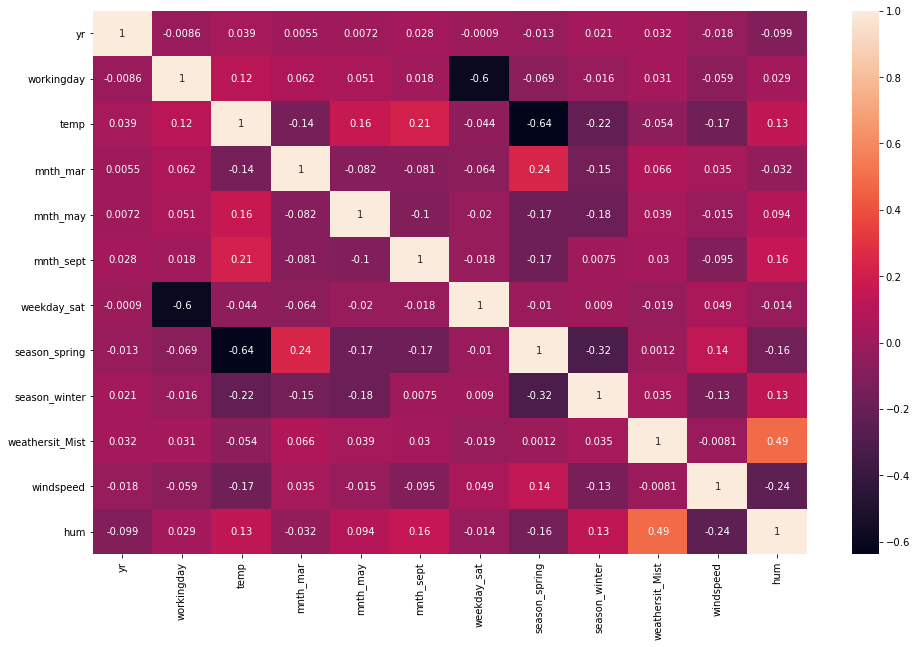

In [65]:
plt.figure(figsize=(16,10))

sns.heatmap(xtrain_rfe.corr(),annot=True)

## 3.3.8 Model8

In [66]:
# Dropping workingday since it has high correlation with weekday_sat 

xtrain_rfe8 = xtrain_rfe.drop(columns=["weekday_sat"],axis=1)

model8,df_xtrain_sm8 = ols_model(ytrain,xtrain_rfe8)
vif = variance_inflation(xtrain_rfe8)
print(model8.summary())
print("\n Variance Inflation Factor \n",vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     195.4
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          6.80e-173
Time:                        00:33:30   Log-Likelihood:                -4166.2
No. Observations:                 511   AIC:                             8356.
Df Residuals:                     499   BIC:                             8407.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3451.4735    103.358     

### Model 8 is the final mode since all the pvalues < .05 & VIF < 5

<AxesSubplot:>

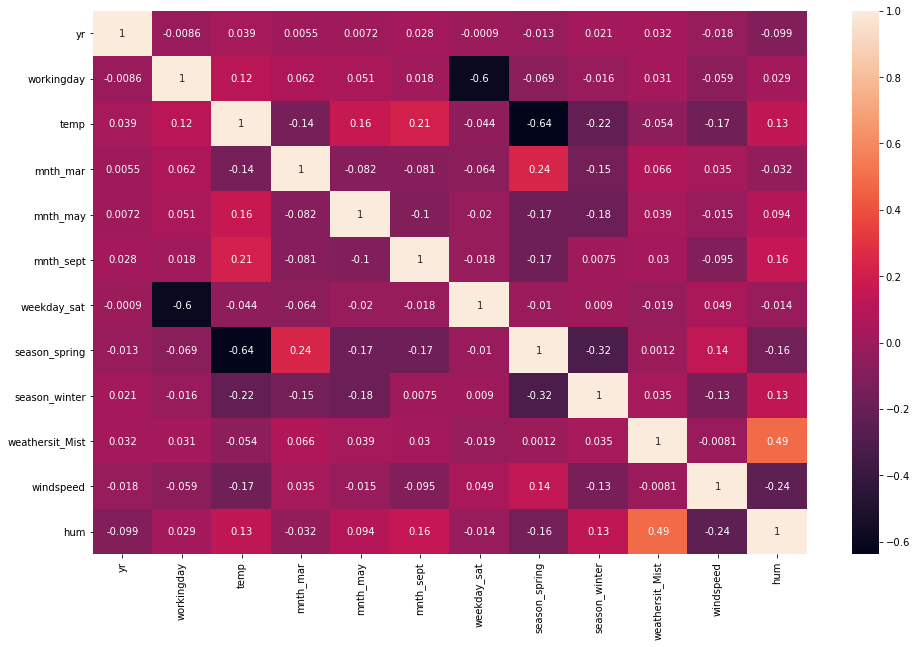

In [67]:
plt.figure(figsize=(16,10))

sns.heatmap(xtrain_rfe.corr(),annot=True)

## 4. Model Evaluation & assessment

## Assumption test 

 Residual Analysis

In [68]:
y_train_pred = pd.DataFrame(model8.predict(df_xtrain_sm8),columns=["cnt"])

y_train_pred.head()

,cnt
683,5282.251203
645,5062.199913
163,4265.536667
360,1106.859390
640,6747.750056


## QQPLOT

Quantile-Quantile (Q-Q) plot, is a graphical tool to help us assess if a set of data plausibly came from some theoretical distribution such as a Normal, exponential or Uniform distribution. Also, it helps to determine if two data sets come from populations with a common distribution.

Text(0, 0.5, 'y_train')

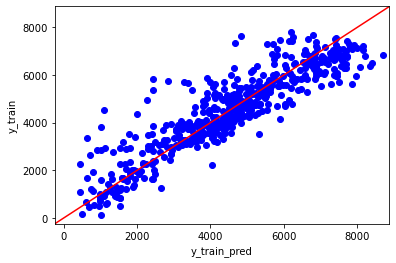

In [69]:
# Training set
#- Similar distribution: 
#    If all point of quantiles lies on or close to straight line at an angle of 45 degree from x -axis

fig = stats.qqplot_2samples(y_train_pred,ytrain,line="45")
plt.xlabel("y_train_pred")
plt.ylabel("y_train")


## 4.1 Error terms are normaly distributed Training set

Text(0.5, 0, 'y_train_pred')

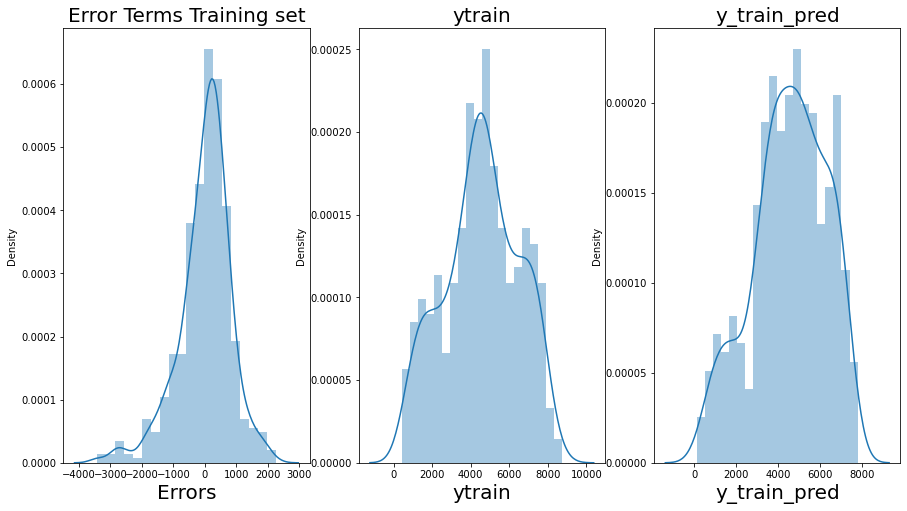

In [70]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 8))

sns.distplot((ytrain-y_train_pred),bins=20,ax=ax1)

ax1.set_title('Error Terms Training set',fontsize=20)
ax1.set_xlabel('Errors',fontsize=20)

sns.distplot((ytrain),bins=20,ax=ax2)

ax2.set_title('ytrain',fontsize=20)
ax2.set_xlabel('ytrain',fontsize=20)

sns.distplot((y_train_pred),bins=20,ax=ax3)

ax3.set_title('y_train_pred',fontsize=20)
ax3.set_xlabel('y_train_pred',fontsize=20)

4.2 ## R2_score on Training data

In [71]:
#Print R-squared Value on training set 
round(r2_score(ytrain,y_train_pred),4)

0.8116

## 4.3 Linearity assumption test Training set

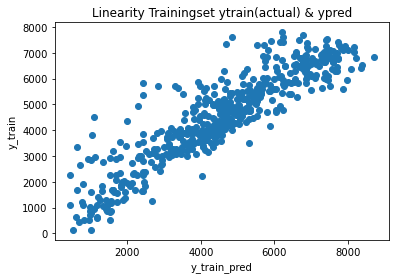

In [72]:
plt.scatter(ytrain,y_train_pred)
plt.ylabel("y_train")
plt.xlabel("y_train_pred")
plt.title("Linearity Trainingset ytrain(actual) & ypred")
plt.show()

In [73]:
xtrain_rfe8.columns

Index(['yr', 'workingday', 'temp', 'mnth_mar', 'mnth_may', 'mnth_sept',
       'season_spring', 'season_winter', 'weathersit_Mist', 'windspeed',
       'hum'],
      dtype='object')

# Test Data Prediction

In [74]:
# Test Data Prediction

xtest = xtest[['yr', 'workingday', 'temp', 'mnth_mar', 'mnth_may', 'mnth_sept',
       'season_spring', 'season_winter', 'weathersit_Mist', 'windspeed',
       'hum']]

xtest_sm = stats.add_constant(xtest)

ytest_pred = pd.DataFrame(model8.predict(xtest_sm),columns=['cnt'])

Text(0, 0.5, 'ytest')

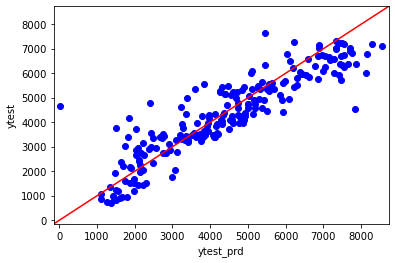

In [75]:
# Testing set
#- Similar distribution: 
#    If all point of quantiles lies on or close to straight line at an angle of 45 degree from x -axis

fig = stats.qqplot_2samples(ytest_pred,ytest,line="45")
plt.xlabel("ytest_prd")
plt.ylabel("ytest")



## QQPlot conclusion Training set and Testing Set

- i. come from populations with a common distribution
- ii. have common location and scale
- iii. have similar distributional shapes
- iv. have similar tail behavior

## 4.4 Error terms are normally distributed test set

Text(0.5, 0, 'ytest_pred')

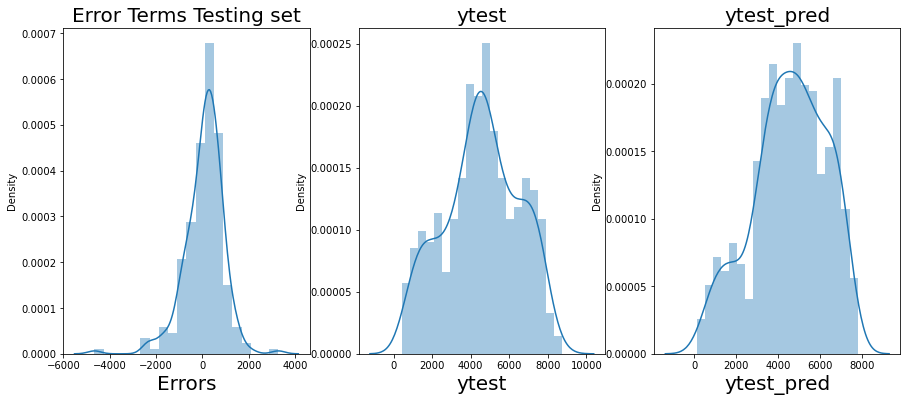

In [76]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 6))

sns.distplot((ytest-ytest_pred),bins=20,ax=ax1)

ax1.set_title('Error Terms Testing set',fontsize=20)
ax1.set_xlabel('Errors',fontsize=20)

sns.distplot((ytrain),bins=20,ax=ax2)

ax2.set_title('ytest',fontsize=20)
ax2.set_xlabel('ytest',fontsize=20)

sns.distplot((y_train_pred),bins=20,ax=ax3)

ax3.set_title('ytest_pred',fontsize=20)
ax3.set_xlabel('ytest_pred',fontsize=20)

## R2 Score on testing data

In [77]:
r2_score(ytest,ytest_pred)

0.8063488189177037

# Result

### Training Score is 81.1 and Test score is 80.6 which is pretty close so it seems out model is working good on the untrained data

## 4.5 Linearity assumption test Testing Data

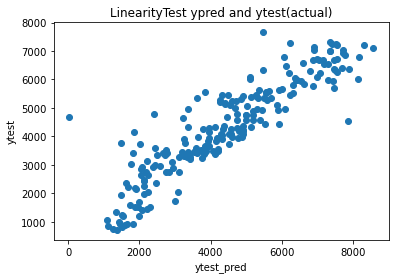

In [78]:
# scatterplot for the check
plt.scatter(ytest,ytest_pred)
plt.ylabel("ytest")
plt.xlabel("ytest_pred")
plt.title("LinearityTest ypred and ytest(actual)")
plt.show()

## 4.6 Homoscedacity error terms must have constant variance at different data points 

cnt    708026.248912
dtype: float64
cnt    714216.724275
dtype: float64


Text(0.5, 1.0, 'Homoscedacity')

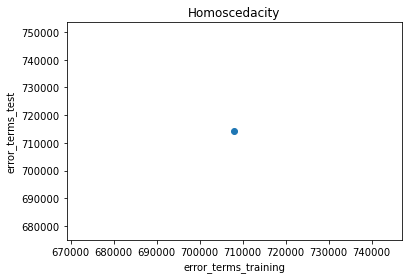

In [79]:
error_terms_training = ytrain-y_train_pred

error_terms_test = ytest-ytest_pred

print(error_terms_training.var())

print(error_terms_test.var())

plt.scatter(error_terms_training.var(),error_terms_test.var())

plt.xlabel("error_terms_training")

plt.ylabel("error_terms_test")

plt.title("Homoscedacity")

# 4.7 Testing Model with random data based on Final Conclusions

In [80]:
sql_data = pd.DataFrame()

sql_data['yr'] = [1,1]
sql_data['workingday'] = [1,1]
sql_data['temp'] = [14.11,30.09]
sql_data['mnth_mar'] = [0,0]
sql_data['mnth_may'] = [0,0]
sql_data['mnth_sept'] = [0,1]
sql_data['season_spring'] = [1,0]
sql_data['season_winter'] = [0,0]
sql_data['weathersit_Mist'] = [1,0]
sql_data['windspeed'] = [10.8,3]
sql_data['hum'] = [80.5,53.1]
sql_data['atemp'] = [13.12,13.15]

sql_data[scaled_list] = scaler.transform(sql_data[scaled_list])

print(sql_data)


sql_data = sql_data[['yr', 'workingday', 'temp', 'mnth_mar', 'mnth_may', 'mnth_sept',
       'season_spring', 'season_winter', 'weathersit_Mist', 'windspeed',
       'hum']]

sql_data_sm = stats.add_constant(sql_data, has_constant='add')

sql_data_pred = pd.DataFrame(model8.predict(sql_data_sm),columns=['cnt'])

sql_data_pred

   yr  workingday      temp  mnth_mar  mnth_may  mnth_sept  season_spring  \
0   1           1 -0.862217         0         0          0              1   
1   1           1  1.277156         0         0          1              0   

   season_winter  weathersit_Mist  windspeed       hum     atemp  
0              0                1  -0.362520  1.232783 -1.343591  
1              0                0  -1.946667 -0.756782 -1.339889  


,cnt
0,3112.164805
1,8185.476382


# Final Model

In [81]:
xtrain_rfe = xtrain_rfe[['yr', 'workingday', 'temp', 'mnth_mar', 'mnth_may', 'mnth_sept',
       'season_spring', 'season_winter', 'weathersit_Mist', 'windspeed',
       'hum']]
model8,df_xtrain_sm8 = ols_model(ytrain,xtrain_rfe)
vif = variance_inflation(xtrain_rfe)
print(model8.summary())
print("\n Variance Inflation Factor \n",vif)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     195.4
Date:                Tue, 14 Dec 2021   Prob (F-statistic):          6.80e-173
Time:                        00:33:31   Log-Likelihood:                -4166.2
No. Observations:                 511   AIC:                             8356.
Df Residuals:                     499   BIC:                             8407.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3451.4735    103.358     

# Model Accuracy

In [82]:
print("Training r2_score",r2_score(ytrain,y_train_pred))
print("Testing r2_score",r2_score(ytest,ytest_pred))

Training r2_score 0.8115714739140492
Testing r2_score 0.8063488189177037


# Based on the Model & EDA please find below inferences

## Conclusions & Final Results




###  EDA ANALYSIS

- Year wise : In year 2019 we have 62.33 % of total Bike sharing
- Month wise : Aug,June,Sep,July,May,Oct - from may to oct we have observe a upward trend in bike sharing
- Highest no of bike sharing will be in fall season and then in summer and spring have least no of bike sharing. - 4. The above trend follows the same for every season i.e. for every season Fall have highest no of bike sharing then summer then winter and spring have least no of bike sharing
- Around 69.6% of bike sharing is use to be done on working days
- HIghest no of bike sharing around 42% between temp 25-35 c and then 40% between 15 - 25 c
- Temp 15-35 c constitutes to 82 percent of total bike sharing and count is increasing with the increase in temp
- aTemp 15-35 c constitutes to 82 percent of total bike sharing and count is increasing with the increase in atemp
- HIghest no of bike sharing around 52% between atemp 25-35 c
- Around 65% of total bike sharing between 50-75 humidity and Count is decreasing with the increase in humidity
- Around 69% of total bike sharing with cloudy weather and the mist with 30%
- Count is decreasing with the increase in windspeed
- Around 63.4 % of Bike sharing population are cloudy
- Linear relationship between cnt & temp ,atemp
- Variables which have high correlation with cnt
- cnt have correlation with below fields (In decreasing correlation order)
- cnt ~ registered,temp,atemp,yr,season,mnth,windspeed(negative corr)
- temp have high correlation with atemp it seems atemp is derived from temp so we can keep temp column and remove atemp
- mnth & season have good correlation
- weathersit & hum have good correlation

### Model Analysis

- During spring season company may notice the downfall
- During winter & summer company may notice the increase in bike sharing count
- Company should expand the business based on the locality Temp 15-35 c constitutes to 82 percent of total bike sharing and with the increase in temp from 15 to 35 bike sharing will increase.
- During rain and thunderstorm company may notice the downfall
- Company Many Notice increase in Bike sharing count for below weather
-       - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
-       - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- If for a particular region if the windspeed is more company should plan the business accordingly since with the increase in windspeed bike sharing will decrease
- Company should target places for business expansion where the humidity is less

## Model Prediction Analysis

For the year 2019 on the working day for sep month and season winter and weather : Mist + Cloudy, Mist + Broken clouds, Mist + Few

with the increase in temp and decrease in humidity ,decrease in windspeed company can experience more Bikesharing

### Significant Variables

-            temp
-            season(spring & winter)
-            yr(2019)
-         mnth : May,Sep,Mar
-   weathersit_Mist
-          mnth_oct
-           holiday
-         windspeed 
-         workingday
-         humidity


